In [1]:
import kwant
import tkwant
from pescado import tools

from qpc_exp2sim.tools import plotting_sim, data_handling as dh
from qpc_exp2sim.simulation import solver, builder
from qpc_exp2sim.simulation.pescado_extension import ReducedPoissonProblem

from scipy import integrate, constants as c
import matplotlib.pyplot as plt
import numpy as np

C:\Users\helle\miniconda3\envs\qpc_exp2sim\lib\site-packages\kwant\solvers\default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


Shape version: 0.2


In [2]:
data = dh.read_file('system_3D/b3_grid10_ldos')

# unpacking the data
p_geom = data.p_geom
p_sim = data.p_sim
V_gates_list = p_sim.V_gates_list
energy_list = p_sim.energy_list
coord = data.coord
voltage = data.voltage
charge = data.charge
conductance = data.conductance
voltage_shift = data.voltage_shift
V3 = data.V3
p_geom.calibration_device = False

ldos = data.ldos

In [3]:
ldos.shape

(96, 100, 10201)

In [4]:
index_v = -10
index_2DEG = np.array(np.where(coord[:,-1] == 0))[0]        
coord_2DEG = coord[index_2DEG][:,0:-1]
voltage_2DEG = voltage[index_v][index_2DEG]
params = {'coord': coord_2DEG, 'voltage':voltage_2DEG}

print('The gate voltage is: ', V_gates_list[index_v])
print('The center of the 2DEG has index: ',np.where(np.all([coord_2DEG[:,0] == 0, coord_2DEG[:,1] == 0], axis=0))[0][0] ,'in the coord_2DEG array')
print('The center of the 2DEG has index: ',np.where(np.all([coord[:,0] == 0, coord[:,1] == 0, coord[:,2] == 0], axis=0))[0][0] ,'in general')

The gate voltage is:  -0.25578947368421057
The center of the 2DEG has index:  5496 in the coord_2DEG array
The center of the 2DEG has index:  54220 in general


In [5]:
# ldos_wave = []
# ldos_built_in = []

# energy_list = np.linspace(-2.5, 7.5, 100)

# for energy in energy_list:
#     # Starting from the wavefunction
#     wave = kwant.wave_function(syst, energy=energy)   
#     ldos_wave.append((np.sum(np.abs(wave(1))**2, axis=0) + np.sum((np.abs(wave(0))**2), axis=0))/(2*np.pi))
    
#     # Using the built in kwant method
#     ldos_built_in.append(kwant.ldos(syst, energy=energy))
    
# ldos_wave = np.array(ldos_wave)
# ldos_built_in = np.array(ldos_built_in)

# plt.figure()
# plt.plot(energy_list, ldos_wave, 'b', label='wave')
# plt.plot(energy_list, ldos_built_in, 'r', label='built in')
# plt.title('ldos')
# plt.xlabel('energy [t]')
# plt.ylabel('ldos')
# plt.show()

<IPython.core.display.Javascript object>


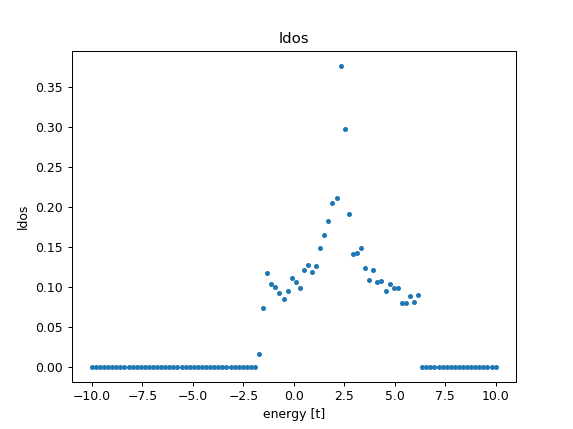

<IPython.core.display.Javascript object>


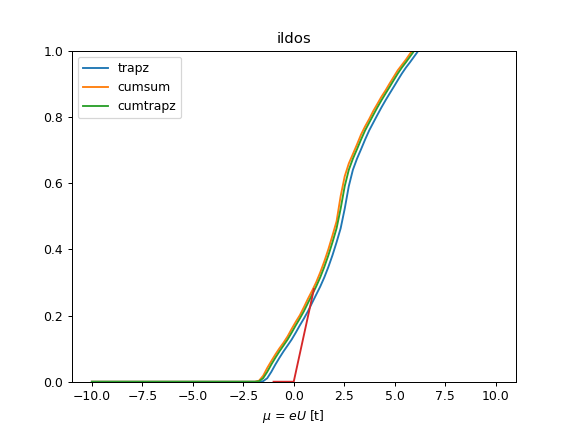

In [6]:
%matplotlib notebook
index_loc = 8000
res = ldos[index_v,:,index_loc]

plt.figure()
plt.plot(energy_list, res, '.') # This is obtained using the built in ldos solver of kwant
#plt.plot(np.linspace(-2.5,7.5,100), ldos_from_wave[:,index_loc], color='r')
plt.title('ldos')
plt.xlabel('energy [t]')
plt.ylabel('ldos')
plt.show()

dx = energy_list[1]-energy_list[0]
# this is not particularly efficient for the calculation of the ildos, a whole new integral for each point, 
# while we could add a single point at the end
ildos_trapz = [np.trapz(res[:slice_index], dx = dx) for slice_index in range(len(res))]
ildos_cumsum = np.cumsum(res)*dx
ildos_cumtrapz = integrate.cumtrapz(res, dx=dx, initial=0)


plt.figure()
plt.plot(energy_list, ildos_trapz, label = 'trapz')
plt.plot(energy_list, ildos_cumsum, label='cumsum')
plt.plot(energy_list, ildos_cumtrapz, label='cumtrapz')
plt.xlabel(r'$\mu$ = $eU$ [t]')
plt.title('ildos')
plt.legend()

# Helmholtz coefficient in 1/(eVm^2) -> should be 1/Jm² ?
hh = p_geom.effective_mass * c.electron_mass /(c.pi * c.hbar **2) 

# Helmholtz coefficient in 1/Vm²
hh *= c.elementary_charge

# Helmholtz coefficient in 1/Vnm²
hh *= 1e-18
plt.plot([-1, 0, 1], [0,0, 1*hh])

plt.ylim(0,1)
plt.show()

# Check slope of ildos curve -> should correspond with slope from 

In [7]:
cell_area = p_geom.grid_fine[0] * p_geom.grid_fine[1] * 1e-18

ldos[index_v, :, 5496] * p_sim.DEG_dens * cell_area * c.elementary_charge / p_geom.t


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.06370758e-06, 6.58236120e-01, 4.82491691e+00,
       4.23416959e+00, 4.27157333e+00, 4.33463162e+00, 4.47815589e+00,
       4.58289592e+00, 4.83571255e+00, 4.88668638e+00, 5.22393757e+00,
       5.26879216e+00, 5.62128074e+00, 5.85432198e+00, 6.12577682e+00,
      

<IPython.core.display.Javascript object>


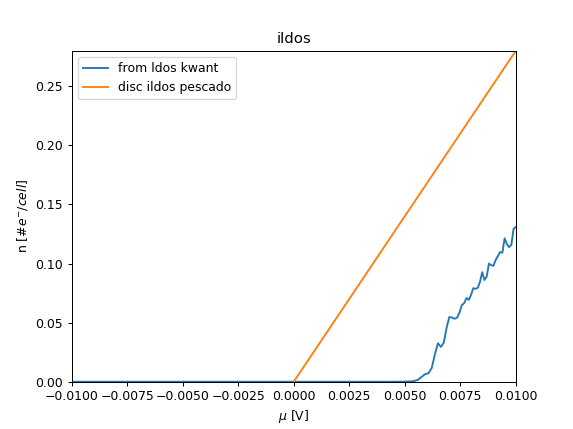

In [9]:
index_loc_DEG = 5496
index_loc_gen = 54220
index_e = 49

dx = energy_list[1]-energy_list[0]
n = np.trapz(ldos[:, :index_e, index_loc_DEG], dx = dx, axis=1) 
V = np.array([voltage_elem[index_loc_gen] for voltage_elem in voltage])

plt.figure()
plt.plot(V, n, label = 'from ldos kwant')
plt.xlabel(r'$\mu$ [V]')
plt.ylabel(r'n [#$e^{-}/cell$]')
plt.title('ildos')

# Helmholtz coefficient in 1/(eVm^2) -> should be 1/Jm² ?
hh = p_geom.effective_mass * c.electron_mass /(c.pi * c.hbar **2) 

# Helmholtz coefficient in 1/Vm²
hh *= c.elementary_charge

# Helmholtz coefficient in 1/Vnm²
hh *= 1e-18 * 100
plt.plot(V, hh*V, label = 'disc ildos pescado')

plt.xlim(-max(V),max(V))
plt.ylim(0, max([max(hh*V), max(n)]))
plt.legend()
plt.show()

# Check slope of ildos curve -> should correspond with slope from 

In [52]:
voltage[0].indices

array([10601, 10602, 10603, ..., 58922, 58923, 58924])

In [7]:
syst = builder.make_kwant_system(p_geom)

In [8]:
density_operator = kwant.operator.Density(syst)
occup = tkwant.manybody.lead_occupation(chemical_potential=0, temperature=0)
state = tkwant.manybody.State(syst, tmax=1, occupations=occup, comm=None, params=params)
state.refine_intervals(rtol=1e-3, atol=1e-3)
density = state.evaluate(density_operator)
error = state.estimate_error()

TypeError: System is missing required arguments: "kwant_indices"

In [ ]:
# Results from linear ildos
plotting_sim.plot_colormap(coord_2DEG, charge[index_v][index_2DEG], p_geom, setting=2)

# Results from tkwant
plotting_sim.plot_colormap(coord_2DEG, density, p_geom, setting=2)

In [ ]:
LDOS = kwant.ldos(syst, energy=0, params=params)

In [ ]:
LDOS

In [ ]:
p_sim.__dict__

In [ ]:
p_geom.t

In [ ]:
np.average(LDOS*(10**-18)/p_geom.t)

In [ ]:
101*101

NameError: name 'np' is not defined

In [4]:
1e15*20**2 *1e-18

0.4